## Titanic Survival Prediction

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
print("Opening CSV file")
df = pd.read_csv(r"C:\Users\sandh\OneDrive\Desktop\Titanic-Dataset.csv")
print(df.head(10))
print("Printed 10 head rows")

Opening CSV file
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timo

In [3]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Axes: >

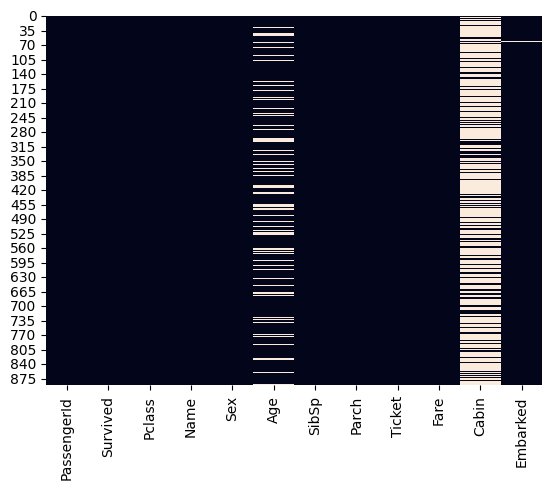

In [4]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
df.drop('Cabin', axis=1, inplace=True) 

In [9]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])

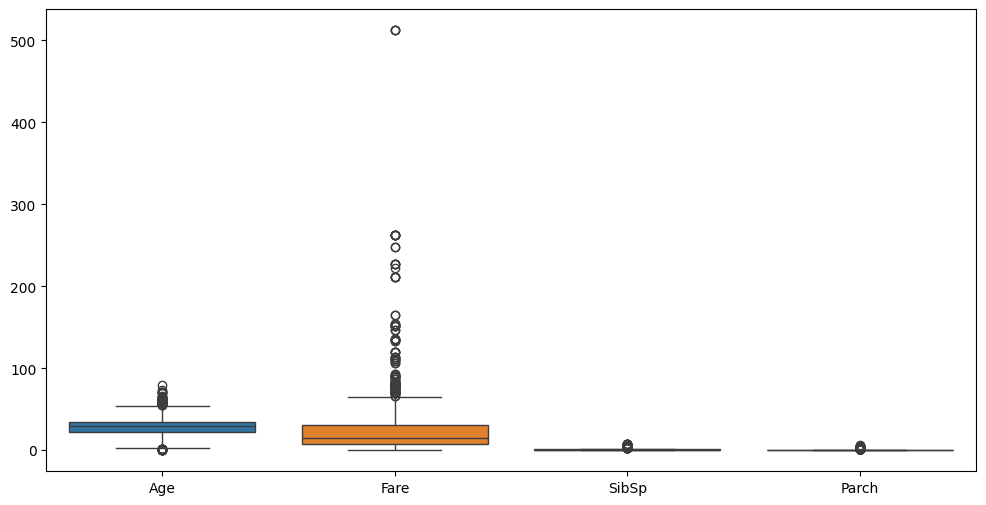

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

In [12]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR)))]


In [13]:
print(df.head())
print(df.info())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex        Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    1  22.000000      1      0   
2                        Heikkinen, Miss. Laina    0  26.000000      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1      0   
4                      Allen, Mr. William Henry    1  35.000000      0      0   
5                              Moran, Mr. James    1  29.699118      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  
5            330877   8.4583         1  
<class 'pandas.core.frame.DataFrame'>
Index: 775 e

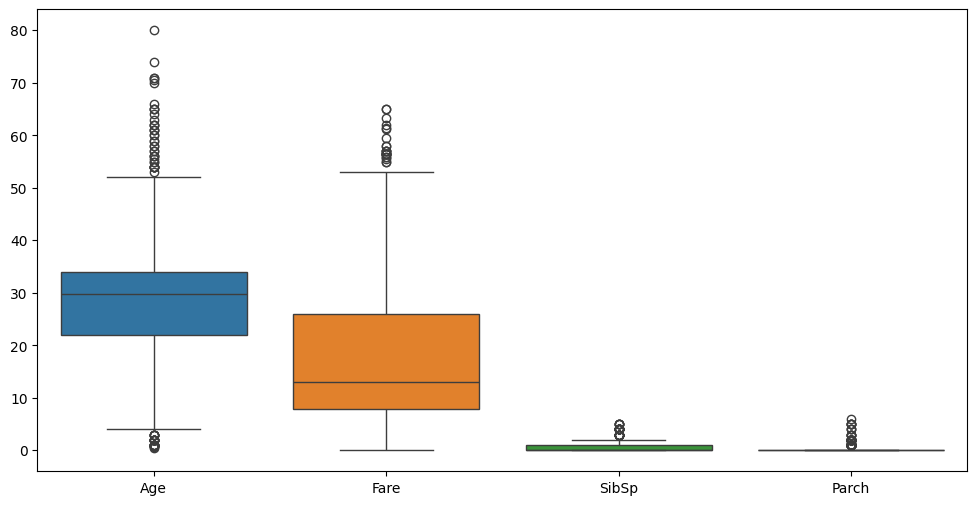

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

In [15]:
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print(f"Survival Rate:\n{survival_rate}")

Survival Rate:
Survived
0    66.064516
1    33.935484
Name: proportion, dtype: float64


C:\Users\sandh\AppData\Local\Temp\ipykernel_13384\2699731972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


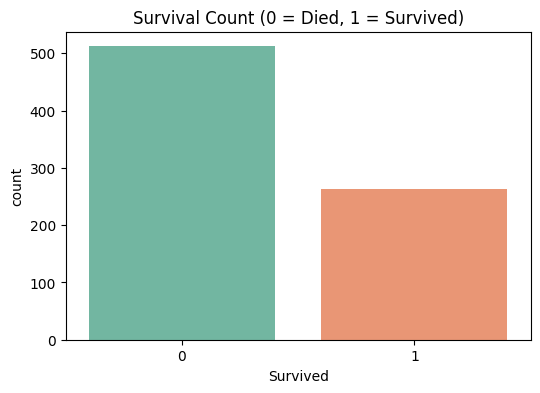

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

C:\Users\sandh\AppData\Local\Temp\ipykernel_13384\870631646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm')


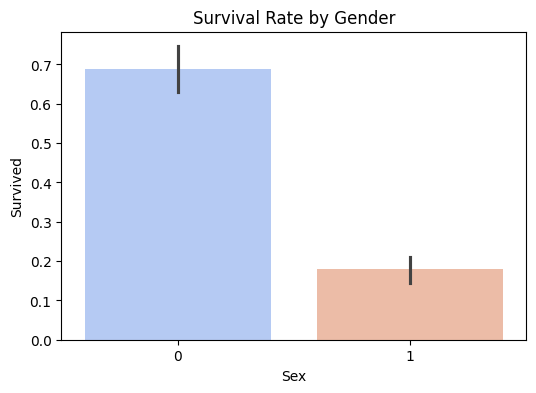

In [17]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm')
plt.title("Survival Rate by Gender")
plt.show()

C:\Users\sandh\AppData\Local\Temp\ipykernel_13384\2120324409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')


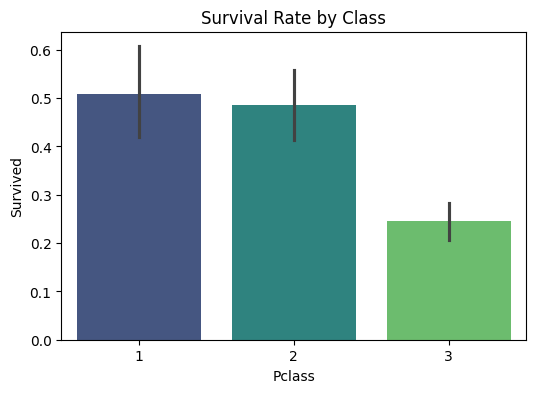

In [18]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title("Survival Rate by Class")
plt.show()

C:\Users\sandh\AppData\Local\Temp\ipykernel_13384\1490951501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette='magma')


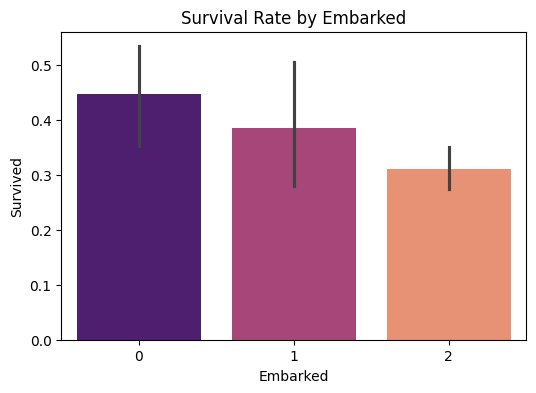

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=df, palette='magma')
plt.title("Survival Rate by Embarked")
plt.show()

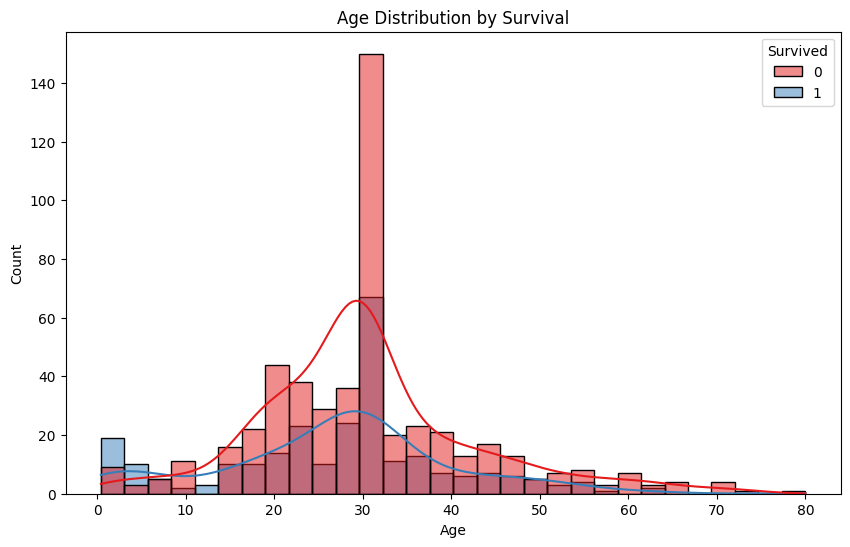

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='Set1')
plt.title("Age Distribution by Survival")
plt.show()

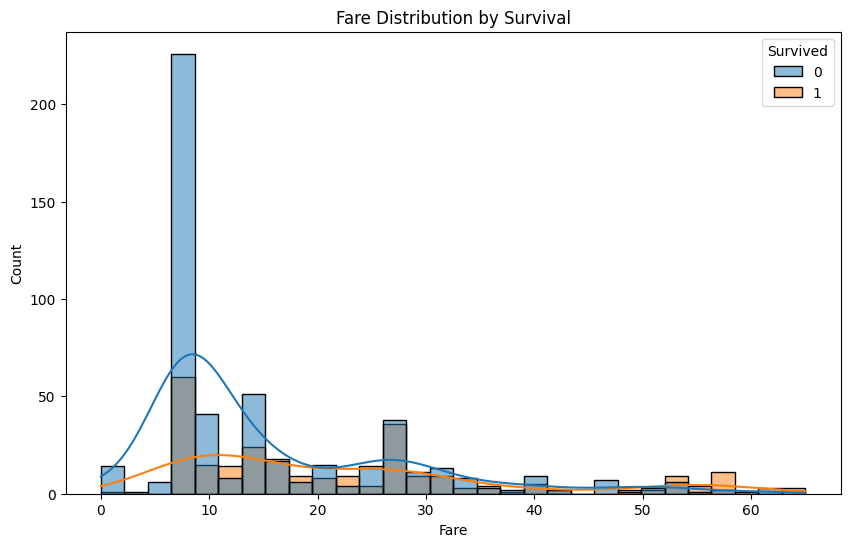

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title("Fare Distribution by Survival")
plt.show()

C:\Users\sandh\AppData\Local\Temp\ipykernel_13384\224213852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df, palette='rocket')


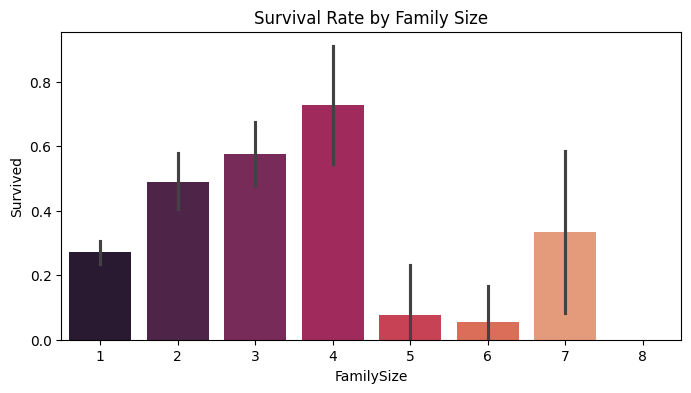

In [22]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for self
plt.figure(figsize=(8, 4))
sns.barplot(x='FamilySize', y='Survived', data=df, palette='rocket')
plt.title("Survival Rate by Family Size")
plt.show()

<Axes: >

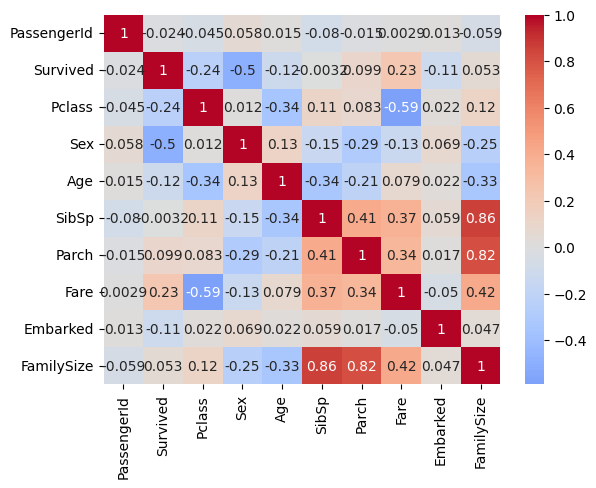

In [23]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)


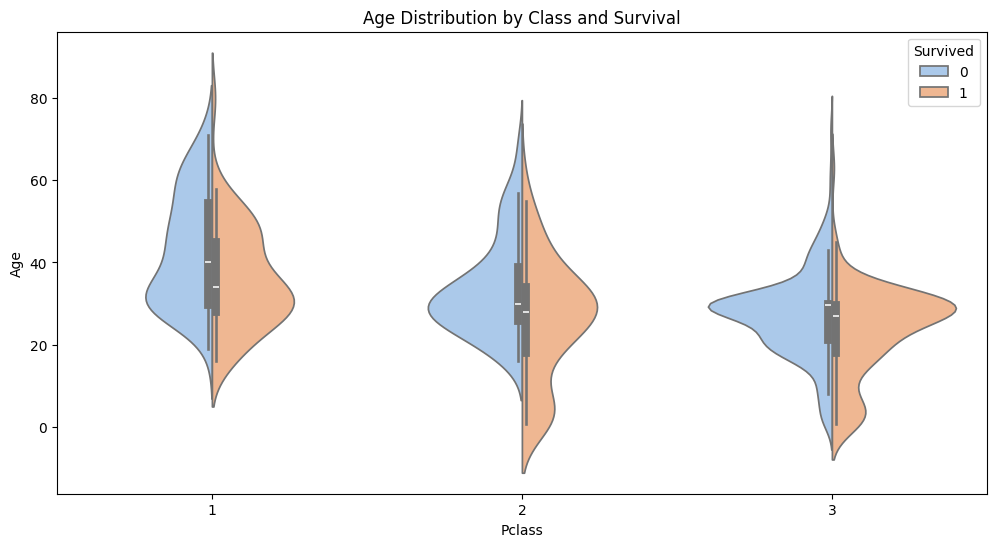

In [24]:
###Age Distribution by Class and Survival
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, palette='pastel')
plt.title("Age Distribution by Class and Survival")
plt.show()

In [25]:
###Create new features
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Senior'])
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'VeryHigh'])
df['IsAlone'] = (df['SibSp'] + df['Parch'] == 0).astype(int)

In [26]:
###Encode categorical features
df = pd.get_dummies(df, columns=['AgeGroup', 'FareBin', 'Embarked'], drop_first=True)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                             Name  Sex        Age  SibSp  \
0                         Braund, Mr. Owen Harris    1  22.000000      1   
2                          Heikkinen, Miss. Laina    0  26.000000      0   
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                        Allen, Mr. William Henry    1  35.000000      0   
5                                Moran, Mr. James    1  29.699118      0   
..                                            ...  ...        ...    ...   
886        

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket',], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

     Pclass  Sex        Age  SibSp  Parch     Fare  FamilySize  IsAlone  \
147       3    0   9.000000      2      2  34.3750           5        0   
868       3    1  29.699118      0      0   9.5000           1        1   
60        3    1  22.000000      0      0   7.2292           1        1   
468       3    1  29.699118      0      0   7.7250           1        1   
777       3    0   5.000000      0      0  12.4750           1        1   
..      ...  ...        ...    ...    ...      ...         ...      ...   
79        3    0  30.000000      0      0  12.4750           1        1   
116       3    1  70.500000      0      0   7.7500           1        1   
308       2    1  30.000000      1      0  24.0000           2        0   
502       3    0  29.699118      0      0   7.6292           1        1   
112       3    1  22.000000      0      0   8.0500           1        1   

     AgeGroup_Teen  AgeGroup_Adult  AgeGroup_Senior  FareBin_Mid  \
147          False           Fa

In [28]:
###Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.78


In [29]:
###Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.76


In [30]:
###Evaluation of the model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        95
           1       0.72      0.63      0.67        60

    accuracy                           0.76       155
   macro avg       0.75      0.74      0.74       155
weighted avg       0.76      0.76      0.76       155

[[80 15]
 [22 38]]
AUC-ROC: 0.74


In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print(f"Mean CV Accuracy: {scores.mean():.2f} (±{scores.std():.2f})")

Mean CV Accuracy: 0.81 (±0.02)


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.85


In [33]:
from sklearn.metrics import f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),

}

results = []

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  F1 Score   ROC-AUC
0  Logistic Regression  0.780645  0.701754  0.759649
1        Random Forest  0.761290  0.672566  0.737719


C:\Users\sandh\AppData\Local\Temp\ipykernel_13384\3212881483.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df.head(10), palette='Blues_r')


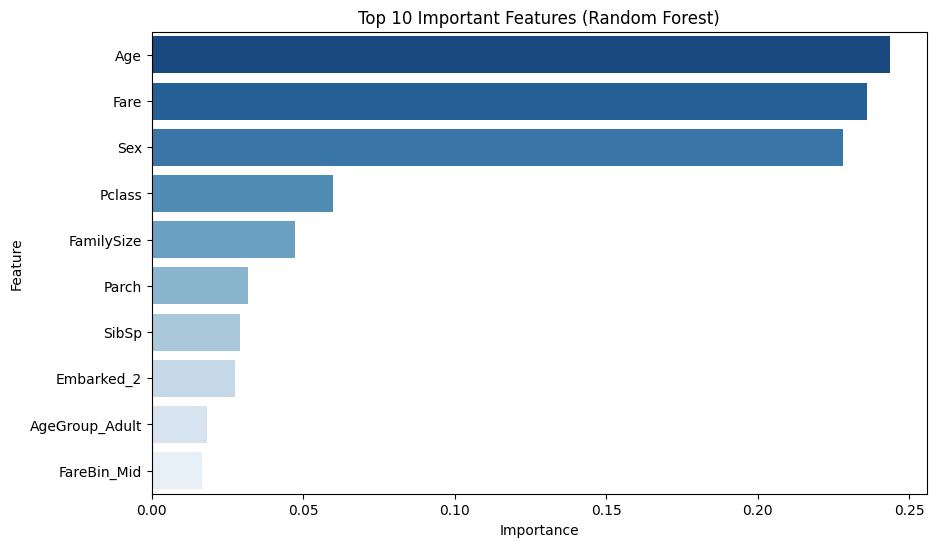

In [34]:
importances = model.feature_importances_  # RandomForest
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(10), palette='Blues_r')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


In [35]:
import joblib
joblib.dump(model, 'titanic_model.pkl')


['titanic_model.pkl']

In [36]:
import altair as alt
print(alt.__version__)  # should be 4.2.2
from altair.vegalite.v4.api import Chart
print("Altair is working correctly.")

5.5.0


ModuleNotFoundError: No module named 'altair.vegalite.v4'

In [37]:
print(X.columns)


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'IsAlone', 'AgeGroup_Teen', 'AgeGroup_Adult', 'AgeGroup_Senior',
       'FareBin_Mid', 'FareBin_High', 'FareBin_VeryHigh', 'Embarked_1',
       'Embarked_2'],
      dtype='object')


In [38]:
import streamlit as st
sibsp = st.number_input("Number of Siblings/Spouses aboard (SibSp)", min_value=0, max_value=10, value=0)
parch = st.number_input("Number of Parents/Children aboard (Parch)", min_value=0, max_value=10, value=0)

family_size = sibsp + parch + 1
is_alone = 1 if family_size == 1 else 0

2025-06-19 01:10:01.864 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:01.868 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:01.869 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:01.871 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:01.872 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-06-19 01:10:01.873 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

In [39]:
# Embarked
embarked = st.selectbox("Port of Embarkation", ['C', 'Q', 'S'])
embarked_q = 1 if embarked == 'Q' else 0
embarked_s = 1 if embarked == 'S' else 0

# AgeGroup
agegroup = st.selectbox("Age Group", ['Child', 'Teen', 'Adult', 'Senior'])
agegroup_teen = 1 if agegroup == 'Teen' else 0
agegroup_adult = 1 if agegroup == 'Adult' else 0
agegroup_senior = 1 if agegroup == 'Senior' else 0

# FareBin
farebin = st.selectbox("Fare Category", ['Low', 'Mid', 'High', 'VeryHigh'])
farebin_mid = 1 if farebin == 'Mid' else 0
farebin_high = 1 if farebin == 'High' else 0
farebin_veryhigh = 1 if farebin == 'VeryHigh' else 0


2025-06-19 01:10:21.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:21.077 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:21.078 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:21.079 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:21.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:21.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:21.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:21.085 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [40]:
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ['male', 'female'])
sex = 1 if sex == 'male' else 0

age = st.slider("Age", 0, 80, 25)
fare = st.slider("Fare", 0, 250, 50)
sibsp = st.number_input("Siblings/Spouses Aboard", 0, 10, 0)
parch = st.number_input("Parents/Children Aboard", 0, 10, 0)

family_size = sibsp + parch + 1
is_alone = 1 if family_size == 1 else 0

embarked = st.selectbox("Port of Embarkation", ['C', 'Q', 'S'])
embarked_q = 1 if embarked == 'Q' else 0
embarked_s = 1 if embarked == 'S' else 0

agegroup = st.selectbox("Age Group", ['Child', 'Teen', 'Adult', 'Senior'])
agegroup_teen = 1 if agegroup == 'Teen' else 0
agegroup_adult = 1 if agegroup == 'Adult' else 0
agegroup_senior = 1 if agegroup == 'Senior' else 0

farebin = st.selectbox("Fare Category", ['Low', 'Mid', 'High', 'VeryHigh'])
farebin_mid = 1 if farebin == 'Mid' else 0
farebin_high = 1 if farebin == 'High' else 0
farebin_veryhigh = 1 if farebin == 'VeryHigh' else 0


2025-06-19 01:10:23.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:23.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:23.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:23.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:23.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:23.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:23.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:23.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [41]:
input_data = pd.DataFrame([{
    'Pclass': pclass,
    'Sex': sex,
    'Age': age,
    'Fare': fare,
    'SibSp': sibsp,
    'Parch': parch,
    'FamilySize': family_size,
    'IsAlone': is_alone,
    'Embarked_Q': embarked_q,
    'Embarked_S': embarked_s,
    'AgeGroup_Teen': agegroup_teen,
    'AgeGroup_Adult': agegroup_adult,
    'AgeGroup_Senior': agegroup_senior,
    'FareBin_Mid': farebin_mid,
    'FareBin_High': farebin_high,
    'FareBin_VeryHigh': farebin_veryhigh
}])


In [42]:
import joblib
model = joblib.load("titanic_model.pkl")  # Replace with your model path if different


In [43]:
if st.button("Predict"):
    prediction = model.predict(input_data)

    if prediction[0] == 1:
        st.success("🎉 The passenger is likely to survive.")
    else:
        st.error("❌ The passenger is not likely to survive.")


2025-06-19 01:10:28.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:28.764 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:28.765 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:28.765 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:10:28.767 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [45]:
import streamlit as st
import joblib
import pandas as pd

# Title
st.title("🚢 Titanic Survival Prediction App")

# User Inputs
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ['male', 'female'])
sex = 1 if sex == 'male' else 0

age = st.slider("Age", 0, 80, 25)
fare = st.slider("Fare", 0, 250, 50)
sibsp = st.number_input("Siblings/Spouses Aboard", 0, 10, 0)
parch = st.number_input("Parents/Children Aboard", 0, 10, 0)

# Feature Engineering
family_size = sibsp + parch + 1
is_alone = 1 if family_size == 1 else 0

# Categorical Inputs → One-hot Encoding
embarked = st.selectbox("Port of Embarkation", ['C', 'Q', 'S'])
embarked_q = 1 if embarked == 'Q' else 0
embarked_s = 1 if embarked == 'S' else 0

agegroup = st.selectbox("Age Group", ['Child', 'Teen', 'Adult', 'Senior'])
agegroup_teen = 1 if agegroup == 'Teen' else 0
agegroup_adult = 1 if agegroup == 'Adult' else 0
agegroup_senior = 1 if agegroup == 'Senior' else 0

farebin = st.selectbox("Fare Category", ['Low', 'Mid', 'High', 'VeryHigh'])
farebin_mid = 1 if farebin == 'Mid' else 0
farebin_high = 1 if farebin == 'High' else 0
farebin_veryhigh = 1 if farebin == 'VeryHigh' else 0

# Input DataFrame (match order & columns from training)
input_data = pd.DataFrame([{
    'Pclass': pclass,
    'Sex': sex,
    'Age': age,
    'Fare': fare,
    'SibSp': sibsp,
    'Parch': parch,
    'FamilySize': family_size,
    'IsAlone': is_alone,
    'Embarked_Q': embarked_q,
    'Embarked_S': embarked_s,
    'AgeGroup_Teen': agegroup_teen,
    'AgeGroup_Adult': agegroup_adult,
    'AgeGroup_Senior': agegroup_senior,
    'FareBin_Mid': farebin_mid,
    'FareBin_High': farebin_high,
    'FareBin_VeryHigh': farebin_veryhigh
}])

# Load model
model = joblib.load("titanic_model.pkl")

# Predict
if st.button("Predict"):
    prediction = model.predict(input_data)
    if prediction[0] == 1:
        st.success("🎉 The passenger is likely to survive.")
    else:
        st.error("❌ The passenger is not likely to survive.")


2025-06-19 01:18:30.485 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:30.486 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:30.486 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:30.488 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:30.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:30.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:30.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:30.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [46]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
joblib.dump(model, 'titanic_model.pkl')
print("✅ Model trained and saved as titanic_model.pkl")


✅ Model trained and saved as titanic_model.pkl


In [47]:
import streamlit as st
import pandas as pd
import joblib

In [48]:
st.title("🚢 Titanic Survival Prediction")


2025-06-19 01:18:34.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:34.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [49]:
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex_input = st.selectbox("Sex", ['male', 'female'])
sex = 1 if sex_input == 'male' else 0
age = st.slider("Age", 0, 80, 25)
fare = st.slider("Fare", 0, 250, 50)
sibsp = st.number_input("Siblings/Spouses Aboard", 0, 10, 0)
parch = st.number_input("Parents/Children Aboard", 0, 10, 0)


2025-06-19 01:18:35.246 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:35.248 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:35.249 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:35.249 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:35.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:35.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:35.254 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:35.255 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [50]:
family_size = sibsp + parch + 1
is_alone = 1 if family_size == 1 else 0

embarked = st.selectbox("Port of Embarkation", ['C', 'Q', 'S'])
embarked_q = 1 if embarked == 'Q' else 0
embarked_s = 1 if embarked == 'S' else 0

agegroup = st.selectbox("Age Group", ['Child', 'Teen', 'Adult', 'Senior'])
agegroup_teen = 1 if agegroup == 'Teen' else 0
agegroup_adult = 1 if agegroup == 'Adult' else 0
agegroup_senior = 1 if agegroup == 'Senior' else 0

farebin = st.selectbox("Fare Category", ['Low', 'Mid', 'High', 'VeryHigh'])
farebin_mid = 1 if farebin == 'Mid' else 0
farebin_high = 1 if farebin == 'High' else 0
farebin_veryhigh = 1 if farebin == 'VeryHigh' else 0


2025-06-19 01:18:36.681 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:36.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:36.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:36.685 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:36.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:36.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:36.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:36.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [51]:
input_data = pd.DataFrame([{
    'Pclass': pclass,
    'Sex': sex,
    'Age': age,
    'Fare': fare,
    'SibSp': sibsp,
    'Parch': parch,
    'FamilySize': family_size,
    'IsAlone': is_alone,
    'Embarked_Q': embarked_q,
    'Embarked_S': embarked_s,
    'AgeGroup_Teen': agegroup_teen,
    'AgeGroup_Adult': agegroup_adult,
    'AgeGroup_Senior': agegroup_senior,
    'FareBin_Mid': farebin_mid,
    'FareBin_High': farebin_high,
    'FareBin_VeryHigh': farebin_veryhigh
}])


In [52]:
model = joblib.load("titanic_model.pkl")

if st.button("Predict"):
    prediction = model.predict(input_data)
    if prediction[0] == 1:
        st.success("🎉 The passenger is likely to survive.")
    else:
        st.error("❌ The passenger is not likely to survive.")


2025-06-19 01:18:38.712 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:38.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:38.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:38.715 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 01:18:38.716 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
